In [1]:
import plotly 
plotly.tools.set_credentials_file(username='ConnorTPhoenix', api_key='BAoqUaFQOvwXlqP9HNyD')

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, datasets, preprocessing, metrics
import spotipy
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline 

### Read in Cleaned Audio Feature DataFrames

In [3]:
# track_lookup retains the unscaled audio features as will as the Spotify ID and Artist/Track Name

In [4]:
audio_feats = pd.read_csv('../../Dropbox/datasets/audio_feats.csv')
track_lookup = pd.read_csv('../../Dropbox/datasets/track_lookup.csv')

In [5]:
audio_feats.head(2)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,...,k_7.0,k_8.0,k_9.0,k_10.0,k_11.0,t_1.0,t_3.0,t_3.90262357102,t_4.0,t_5.0
0,0.635909,-0.535033,-0.152610,-0.401025,0.255999,1.962191,1.612138,2.554877,-0.464801,-0.728601,...,0,0,0,0,0,0,0,0,1,0
1,1.064187,-0.862847,0.092648,0.204026,-0.754515,2.051700,1.692874,0.619663,-0.277583,1.772723,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X = audio_feats.drop('popularity', axis=1)
y = audio_feats['popularity']
X.shape

(24323, 28)

### Create a Simple Reccommender (Fit KNN Model and Return n Closest Neighbors)
* (Excluding Key and Time Signature Binary Variables)

In [7]:
knn = KNeighborsClassifier()
knn.fit(X, np.random.randint(2, size=24323))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
Artist_Track = 'Tom Baxter: Better'
NoSongs = 15
Neighbors = knn.kneighbors(X.iloc[track_lookup[track_lookup['Artist_Track'] == Artist_Track].index.values[0],:], n_neighbors=NoSongs, return_distance=False)

for n in Neighbors:
    print track_lookup['Artist_Track'].iloc[n]

8024                                    Tom Baxter: Better
20636                                Richie Kotzen: Change
5493                          Thurston Moore: Honest James
14556                                  Owen: She'S A Thief
714                             Jet: Look What You'Ve Done
22348         Hexicon: Something Strange Beneath The Stars
7351                              Queen: Bohemian Rhapsody
12321                                James Blunt: Shine On
16583                              Alesana: Early Mourning
11715                         Bruce Springsteen: Johnny 99
13986                               R.E.M.: Find The River
1300                             Imogen Heap: Just For Now
17460    Nancy Sinatra & Lee Hazlewood: You'Ve Lost Tha...
503                 The Beatles: The Long And Winding Road
7951                             Alanis Morissette: Unsent
Name: Artist_Track, dtype: object


/Users/connorphoenix/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



In [9]:
track_lookup['Artist_Track']

0                                          Masomenos: Four
1                                       Marc Mac: Footwork
2                         Röyksopp: The Girl And The Robot
3                                  Röyksopp: Happy Up Here
4                               Bugge Wesseltoft: Dreaming
5                                Röyksopp: Miss It So Much
6                                Röyksopp: This Must Be It
7                        Fleet Foxes: Blue Ridge Mountains
8                              Fleet Foxes: Your Protector
9                         Fleet Foxes: Heard Them Stirring
10                        Fleet Foxes: He Doesn'T Know Why
11                         Miss Kittin & The Hacker: Nurse
12                Miss Kittin & The Hacker: Stock Exchange
13                         Fleet Foxes: Drops In The River
14                                  Fleet Foxes: Sun Giant
15                               Fleet Foxes: Oliver James
16                               Fleet Foxes: Quiet Hous

## Create Track K-Means Clusters (K=10)

In [10]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(X.iloc[:,0:11])
labels = kmeans.labels_
X['labels'] = labels

#### Identify Each Closest and 2nd Closest Track to Each Cluster Centroid

In [11]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X.iloc[:,0:11])
print 'Tracks Closest to Centroids:'
print ' '
for i in closest:
    print track_lookup.loc[i,'Artist_Track']

Tracks Closest to Centroids:
 
Idlewild: I Never Wanted
Out Hud: My Two Nads
Goatsnake: Man Of Light
Stone & Charden: Made In Normandie
Kiss: Firehouse
Múm: Awake On A Train
Findlay Brown: Losing The Will To Survive
Counting Crows: Ghost Train
Q-Unique: Psychological Warfare
The Microphones: Tonight There'Ll Be Clouds


In [12]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, \
                                           X[np.logical_not(X.index.isin(closest))].iloc[:,0:11])
print 'Tracks 2nd Closest to Centroids:'
print ' '
for i in closest:
    print track_lookup.loc[i,'Artist_Track']

Tracks 2nd Closest to Centroids:
 
The The: The Whisperers
The Rutles: I Must Be In Love
Margot & The Nuclear So And So'S: Quiet As A Mouse
Merle Haggard: Leavin'S Getting Harder
Paul Simon: Late In The Evening
Pavement: Jam Kids
David Guetta: Never Take Away My Freedom
Secret Mommy: I Can'T Get Down
Violent Femmes: Gimme The Car
Susumu Yokota: Fukuro No Yume


#### Investigate Subjectively Each Cluster Starting With Closest Tracks (Listen to the Songs!) 

Label 0 
Live, lots of clapping. In French with lots of accordion, polka feel. Marching drums. 

Label 1
Crisp drums. Slowish, emotional vocals. Pad organ. Clean electric guitar.

Label 2
Up tempo folky. Acoustic. Fleet Foxes/Simon Garfunkel type vocal harmonies.

Label 3
Skit news story beginning about terrorism. Gangsta rap. Eminemish. Gun shots. Distant harmonious eastern horn line motif.

### Visualize the Mean Standardized Value of Each Audio Feature for Each Cluster 

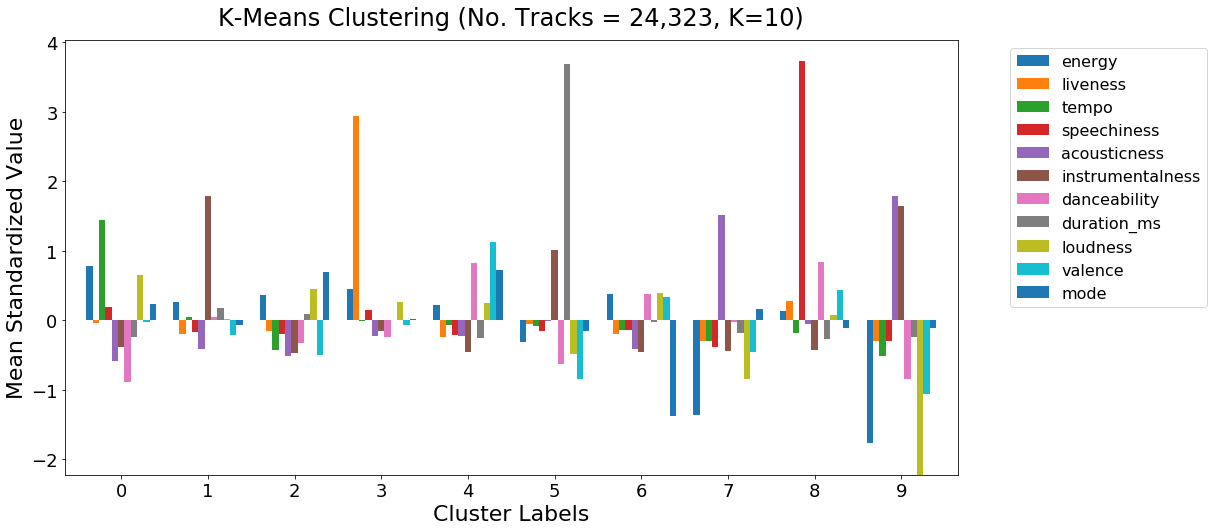

In [13]:
X.iloc[:,[-1,0,1,2,3,4,5,6,7,8,9,10]].groupby('labels').mean().plot(kind='bar', figsize=(16,8), width=.8)
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size':16})
plt.xlabel('Cluster Labels', fontsize=22)
plt.ylabel('Mean Standardized Value', fontsize=22)
plt.title('K-Means Clustering (No. Tracks = 24,323, K=10)', fontsize=24, y=1.02)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.savefig('../DSI---Capstone-Project/Track_clusters.png', bbox_inches='tight')

In [16]:
X

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,...,k_8.0,k_9.0,k_10.0,k_11.0,t_1.0,t_3.0,t_3.90262357102,t_4.0,t_5.0,labels
0,0.635909,-0.535033,-0.152610,-0.401025,0.255999,1.962191,1.612138,2.554877,-0.464801,-0.728601,...,0,0,0,0,0,0,0,1,0,5
1,1.064187,-0.862847,0.092648,0.204026,-0.754515,2.051700,1.692874,0.619663,-0.277583,1.772723,...,0,0,0,0,0,0,0,1,0,1
2,0.929358,-0.569062,-0.082648,-0.152799,-0.384501,-0.636360,0.049329,0.200448,0.721719,-1.521540,...,0,1,0,0,0,0,0,1,0,6
3,0.842117,0.270324,-0.675983,0.789685,-0.721810,-0.062586,1.000855,-0.768328,1.046817,0.850975,...,0,0,1,0,0,0,0,1,0,4
4,-0.922546,-0.616136,1.920630,0.041128,0.687290,2.107258,0.245401,1.922216,-2.233677,-1.486876,...,0,0,0,0,0,0,0,1,0,5
5,0.739013,0.882849,0.359176,-0.448860,-0.723676,1.885027,0.770182,0.501689,0.685377,1.402448,...,0,0,0,0,0,0,0,1,0,1
6,1.163325,3.321605,-0.052747,-0.168313,-0.754189,-0.635650,0.130065,0.316700,0.844401,0.256172,...,0,0,0,0,0,0,0,1,0,3
7,-0.867028,-0.603091,-0.869049,-0.574266,1.459753,-0.634385,0.124298,0.171724,0.171079,-0.929494,...,1,0,0,0,0,0,0,1,0,7
8,-0.466510,-0.757924,-0.797592,-0.582023,0.999494,-0.620233,0.210800,0.023810,0.165572,-1.240683,...,0,0,0,0,0,0,0,1,0,7
9,-0.771856,0.984936,-0.456345,-0.561338,1.443660,2.354182,0.401105,-0.597085,-0.386830,-0.894042,...,0,0,0,0,0,0,0,1,0,1


### Visualize Audio Feature Differences Between Songs in 3 (n=2058)and Songs in 4 (n=21746).

In [14]:
X[X['t_3.0']==1].groupby('t_3.0')[X.iloc[:,0:11].columns].mean().T[1].values

array([-0.70159646, -0.04998394,  0.10559856, -0.10141752,  0.63190878,
        0.1652026 , -0.59798981,  0.01452095, -0.57310634, -0.56245832,
        0.03941096])

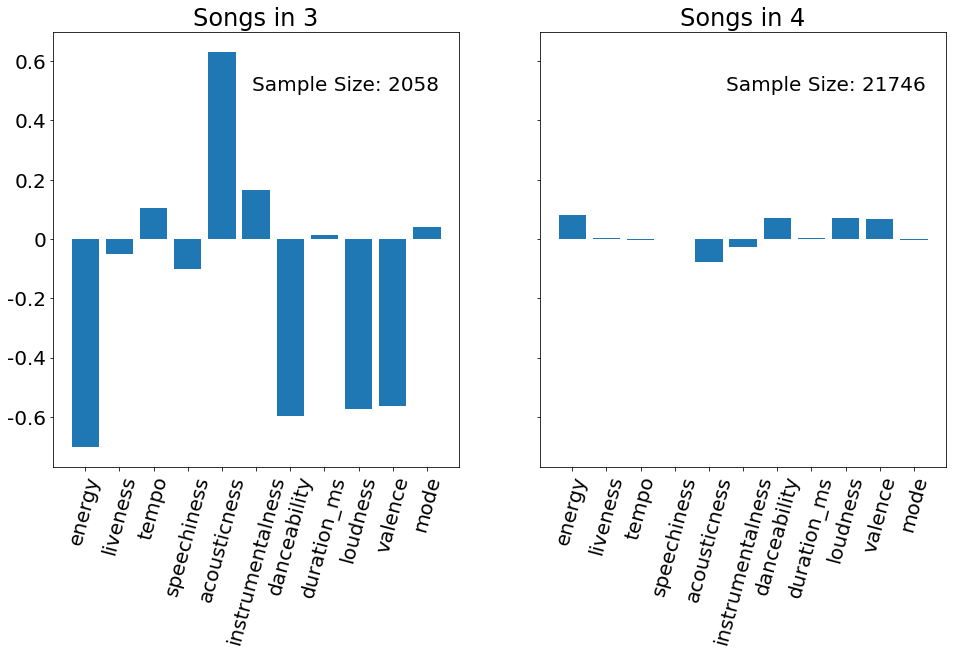

In [15]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16,8))
for i, n in enumerate(['t_3.0', 't_4.0']):
    y1=X[X[n]==1].groupby(n)[X.iloc[:,0:11].columns].mean().T[1].values
    x1=[0,1,2,3,4,5,6,7,8,9,10]
    axes[i].bar(x1, y1, align='center')
    axes[i].set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    axes[i].set_xticklabels(X[X[n]==1].groupby(n)[X.iloc[:,0:11].columns].mean().T[1].index, rotation=75, size =20,)
    axes[i].set_yticklabels([-.8,-.6, -.4, -.2,0,.2,.4,.6, .8],size=20)
    axes[i].set_title(n, size = 24)
    if n == 't_3.0':
        axes[i].set_title('Songs in 3', size = 24)
    else:
        axes[i].set_title('Songs in 4', size = 24)
    axes[i].annotate('Sample Size: {}'.format(X[X[n]==1].shape[0]), xy=(.95, .9), xycoords='axes fraction', fontsize=20,
                horizontalalignment='right', verticalalignment='top'
            
            
            )
plt.show()
fig.savefig('../DSI---Capstone-Project/Time_Sig.png', bbox_inches='tight')
plt.close(fig)   

### What About Mode? (Major or Minor)
* There Does Not Appear to Be a Significant Difference in Audio Features of Songs in Minor v. Major Modes

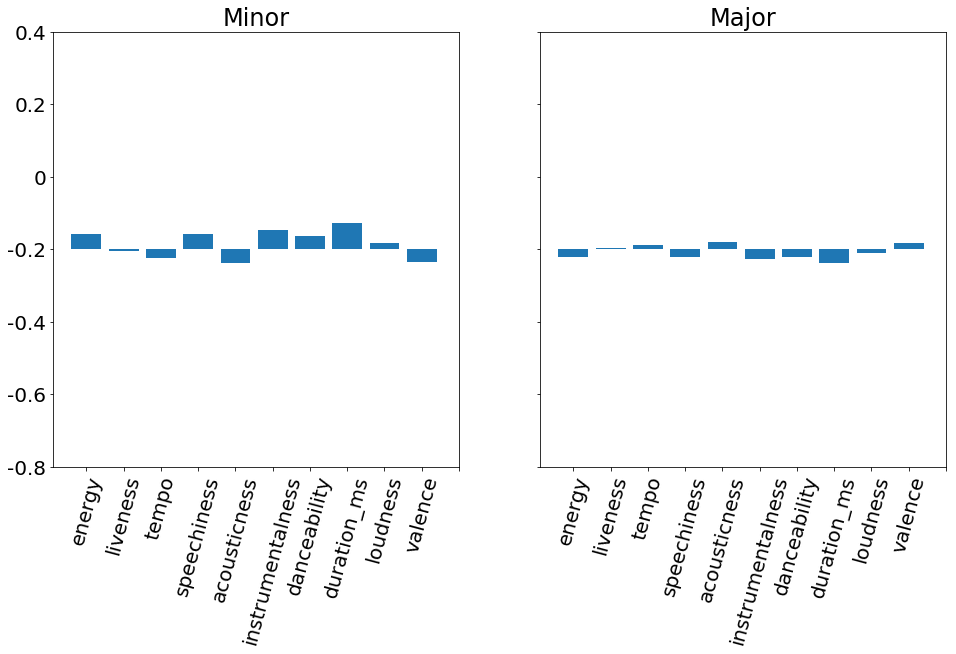

In [16]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16,8))
for i, n in enumerate(X.groupby('mode')[X.iloc[:,0:10].columns].mean().index):
    y1=X[X['mode']==n].groupby('mode')[X.iloc[:,0:10].columns].mean().values[0]
    x1=[0,1,2,3,4,5,6,7,8,9]
    axes[i].bar(x1, y1, align='center')
    axes[i].set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    axes[i].set_xticklabels(X[X['mode']==n].groupby('mode')[X.iloc[:,0:11].columns].mean().columns[0:10], rotation=75, size =20,)
    axes[i].set_ylim(-.6, .6)
    axes[i].set_yticklabels([-.8,-.6, -.4, -.2,0,.2,.4,.6, .8],size=20)
    if n == X.groupby('mode')[X.iloc[:,0:10].columns].mean().index[0]:
        axes[i].set_title('Minor', size = 24)
    else:
        axes[i].set_title('Major', size = 24)

In [17]:
# for c in X.iloc[:,23:28].columns:
#     X.groupby(c)[['acousticness','valence']].mean().T.plot(kind='bar', figsize=(20,10), width=.8, color='g')
#     plt.title(c, fontsize=24)
#     plt.xlabel('Cluster Label', fontsize=20)
#     plt.xticks(rotation=0, fontsize=16)
#     plt.show()

## Principal Component Analysis

In [18]:
pca = PCA().fit(X.iloc[:,0:11].corr())

In [19]:
pca.explained_variance_ratio_

array([  4.62671720e-01,   1.72721997e-01,   9.08617547e-02,
         8.05484562e-02,   6.25051000e-02,   4.69612017e-02,
         4.51212730e-02,   2.51307760e-02,   1.17313472e-02,
         1.74637432e-03,   1.99112248e-36])

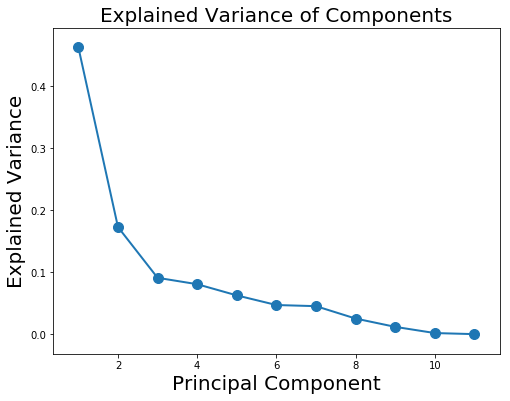

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,12), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, 12), pca.explained_variance_ratio_, s=100)
ax.set_title('Explained Variance of Components', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=20)
ax.set_ylabel('Explained Variance', fontsize=20);
plt.savefig('../DSI---Capstone-Project/PCA_EV.png')

In [21]:
print 'Eigen Vectors:'
pd.DataFrame(pca.components_, index=X.iloc[:,0:11].columns)

Eigen Vectors:


,0,1,2,3,4,5,6,7,8,9,10
energy,-0.536171,-0.076428,-0.162775,-0.098833,0.501233,0.254998,-0.072380,0.094671,-0.522284,-0.253941,0.051850
liveness,-0.185792,-0.190675,-0.187509,0.023196,0.185892,-0.300348,0.602123,-0.336003,-0.093961,0.531470,0.043843
tempo,0.051350,-0.514269,-0.071675,-0.429810,-0.209280,0.316786,0.283884,0.506224,0.059339,0.105986,-0.217389
speechiness,-0.027650,-0.331097,0.432078,-0.449273,0.027527,-0.071956,-0.211807,-0.224004,0.046354,0.047959,0.629006
acousticness,-0.041088,-0.247662,0.670930,0.188787,0.107181,0.173301,-0.051884,-0.271597,-0.123207,0.096827,-0.555567
instrumentalness,-0.039050,-0.556577,0.034210,0.655183,-0.037710,-0.254762,0.020761,0.283716,0.008138,-0.223714,0.246775
danceability,0.177720,-0.188872,-0.291998,0.245791,-0.188131,0.694098,0.023394,-0.472743,-0.016231,-0.007181,0.213433
duration_ms,0.095248,-0.366955,-0.366005,-0.184297,0.368938,-0.204014,-0.254686,-0.298649,0.436345,-0.261079,-0.313042
loudness,0.116602,-0.116008,-0.204047,0.106482,0.098858,0.000703,-0.618713,0.187455,-0.176680,0.678565,-0.024265
valence,0.701683,-0.086391,-0.043681,-0.127289,0.089774,-0.204513,0.096484,-0.062537,-0.615549,-0.197546,-0.032222


In [22]:
pca_df = pd.DataFrame(pca.transform(X.iloc[:,0:11]))
pca_df.shape

(24323, 11)

In [23]:
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import matplotlib.pyplot as plt
# colors = {0:'blue', 1:'red', 2:'green', 3:'purple', 4:'orange', 5:'black',6:'yellow', 7:'white', 8:'magenta', 9:'cyan'}

# fig = plt.figure(figsize=(16,12))
# ax = fig.gca(projection='3d')

# x = pca_df[0]
# y1 = pca_df[1]
# z = pca_df[2]
# s = ax.scatter(x, y1, z, s=2, depthshade=True, c=X['labels'].apply(lambda x: colors[x]))
# # s.set_edgecolors = s.set_facecolors = lambda *args:None

# ax.legend
# ax.set_xlim3d(-3, 8)
# ax.set_ylim3d(-3,3)
# ax.set_zlim3d(-3,3)
# plt.title('Track 1st 3 Principal Components', y=1.05, fontsize=24)
# ax.set_xlabel('PCA 1', fontsize=18)
# ax.set_ylabel('PCA 2', fontsize=18)
# ax.set_zlabel('PCA 3', fontsize=18)
# # ax.view_init(azim=90)
# # for i, party in enumerate(votes['Class_abbr']):

# #     ax.text(pca_df.iloc[i][0], pca_df.iloc[i][1], pca_df.iloc[i][2],party, withdash=True)
# # ax.set(xlabel="pc1",ylabel="pc2",zlabel="pc3")
# # ax.view_init(15, 130)
# # plt.draw()


# ax.view_init(azim=90)

In [24]:
pca_df['labels'] = X['labels']

In [25]:
pca_df['Track'] = track_lookup['Artist_Track']
# pca_df = pca_df[(pca_df[0] > -2)&(pca_df[0] <2)&(pca_df[1] > -2)&(pca_df[1] <2)&(pca_df[2] > -2)&(pca_df[2] <2)]
# print pca_df[[1]].max()
# print pca_df[[2]].max()

In [40]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
labels = [0,1,2,3,4,5,6,7,8,9]
traces = []
for l in labels:
    x, y, z = pca_df[pca_df['labels']==l].iloc[:,0:3].values.transpose()
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=3,
            line=dict(color='rgba(2, 100, 50, 0.14)', width=1), opacity=0),
        text = list(pca_df[pca_df['labels']==l]['Track']))
    traces.append(trace)


data = traces
layout = go.Layout(showlegend=False,
    scene = go.Scene(
        xaxis = go.XAxis(title ='PC #1'),
        yaxis = go.YAxis(title ='PC #2'),
        zaxis = go.ZAxis(title ='PC #3')
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='show-legend')

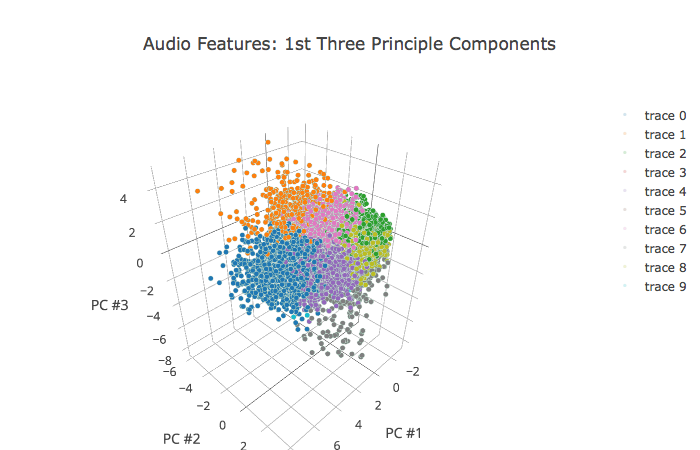

In [42]:
from IPython.display import Image
Image(filename='../../Downloads/PCA.png') 

In [44]:
pca_df=pca_df[(pca_df[2] < 5) & (pca_df[2] < 5)]

In [45]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
labels = [0,1,2,3,4,5,6,7,8,9]
traces = []
for l in labels:
    x, y, z = pca_df[pca_df['labels']==l].iloc[:,0:3].values.transpose()
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=3,
            line=dict(color='rgba(2, 100, 50, 0.14)', width=1), opacity=0),
        text = list(pca_df[pca_df['labels']==l]['Track']))
    traces.append(trace)


data = traces
layout = go.Layout(showlegend=False,
    scene = go.Scene(
        xaxis = go.XAxis(title ='PC #1'),
        yaxis = go.YAxis(title ='PC #2'),
        zaxis = go.ZAxis(title ='PC #3')
    ),title= 'Audio Features: 1st Three Principle Components',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=-20
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')
# fig.savefig('../DSI---Capstone-Project/3D_Scatter.png')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ConnorTPhoenix/0 or inside your plot.ly account where it is named 'simple-3d-scatter'
